<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Yohann Jacob Sandvik 
<b> Student 2:</b> Eivind Høydal
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [13]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [14]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

o1_1 = 1/(1 + np.exp(-(x1*w1_11 + x2*w1_21 + w1_01*1))) # Output of the green neuron
o1_2 = 1/(1 + np.exp(-(x1*w1_12 + x2*w1_22 + w1_02*1))) # Output of the red neuron
o2_1 = 1/(1 + np.exp(-(o1_1*w2_11 + o1_2*w2_21 + w2_01*1))) # Output of the black neuron

#print("=== FORWARD PASS 1 ===")
#print("o =", o2_1)

# NOTE
# Changed function dsigmoid(x), to make it more accurate
# dsigmoid(x) = np.exp(-x) / (1 + np.exp(-x)) ** 2
u21 = o1_1*w2_11 + o1_2*w2_21 + w2_01*1
# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = 2*(o2_1 - y) * dsigmoid(u21) * 1
dL_w2_11 = 2*(o2_1 - y) * dsigmoid(u21) * o1_1
dL_w2_21 = 2*(o2_1 - y) * dsigmoid(u21) * o1_2

u11 = x1*w1_11 + x2*w1_21 + w1_01*1
u12 = x1*w1_12 + x2*w1_22 + w1_02*1
# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = 2*(o2_1 - y) * dsigmoid(u21) * w2_11 * dsigmoid(u11) * 1 #Why are we not using the bias weight?
dL_w1_11 = 2*(o2_1 - y) * dsigmoid(u21) * w2_11 * dsigmoid(u11) * x1
dL_w1_21 = 2*(o2_1 - y) * dsigmoid(u21) * w2_11 * dsigmoid(u11) * x2
dL_w1_02 = 2*(o2_1 - y) * dsigmoid(u21) * w2_21 * dsigmoid(u12) * 1 # should we use u11 here instead?
dL_w1_12 = 2*(o2_1 - y) * dsigmoid(u21) * w2_21 * dsigmoid(u12) * x1# should we use u11 here instead? 
dL_w1_22 = 2*(o2_1 - y) * dsigmoid(u21) * w2_21 * dsigmoid(u12) * x2# should we use u11 here instead? 

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

#W_input_to_hidden = np.array([[w1_11, w1_12], [w1_21, w1_22], [w1_01, w1_02]])
#W_hidden_to_output = np.array([[w2_11], [w2_21], [w2_01]])
print("=== BACKWARD PASS ===")
#print('[w1_11, w1_12]\n[w1_21, w1_22]\n[w1_01, w1_02]\n=\n', W_input_to_hidden, '\n')
#print('[[w2_11]\n[w2_12]\n[w2_01]]\n=\n', W_hidden_to_output)
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = 1/(1 + np.exp(-(x1*w1_11 + x2*w1_21 + w1_01*1))) # Output of the green neuron
o1_2 = 1/(1 + np.exp(-(x1*w1_12 + x2*w1_22 + w1_02*1))) # Output of the red neuron
o2_1 = 1/(1 + np.exp(-(o1_1*w2_11 + o1_2*w2_21 + w2_01*1))) # Output of the black neuron

print("=== FORWARD PASS 2 ===")
print("Output =", o2_1)

=== BACKWARD PASS ===
w1_01 = 0.2540331790269339
w1_11 = 0.3432265432215471
w1_21 = 0.8108066358053868
w1_02 = -0.4341841377344243
w1_12 = -0.5273473101875394
w1_22 = 0.19316317245311515
w2_01 = 0.10637455535192786
w2_11 = -0.8541467506279605
w2_21 = 0.2745727217772572
=== FORWARD PASS 2 ===
Output = 0.40648823589210104


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [15]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs] # adds bias
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 = np.dot(self.input,self.W_input_to_hidden)
        # Compute activations for the hidden layer
        # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1] + 1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] = transfer_f(u_1)# Compute output of hidden layer
        
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output) # laget selv
        self.u_output = u_2
        self.o_output = transfer_f(u_2) # Laget selv

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [16]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [17]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        targets = np.array(targets) # Target outputs
        
        # Partial derivative of loss wrt activations of output layer (dL/du_output)
        self.dL_du_output = 2 * (self.o_output-targets) * transfer_df(self.u_output)

        # Partial derivative of loss wrt activations of hidden layer (dL/du_hidden)
        self.dL_du_hidden = np.multiply(np.dot(self.W_hidden_to_output[:-1],self.dL_du_output.T).T,transfer_df(self.u_hidden))
        # Do we want to drop the bias (w1_0i)?
        
        # Compute partial derivative of loss with respect to weights
        # Hidden to output
        dL_dW_hidden_to_output = np.dot(self.dL_du_output.T, self.o_hidden).T
        # Shape = [nr_hidden_neurons + 1, nr_outputs]
        
        # Input to hidden
        dL_dW_input_to_hidden = np.dot(self.dL_du_hidden.T, self.input).T
        # Shape = [nr_input_vals + 1, nr_hidden_neurons]
        
        # Make updates
        self.W_hidden_to_output -= learning_rate*dL_dW_hidden_to_output / len(targets)
        self.W_input_to_hidden -= learning_rate*dL_dW_input_to_hidden / len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [18]:
# First define your neural network
model = NeuralNetwork(2,2,1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden = \n", model.W_input_to_hidden, '\n')
print("W_hidden_to_output = \n", model.W_hidden_to_output, '\n')

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])


W_input_to_hidden = 
 [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]] 

W_hidden_to_output = 
 [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]] 

Output = 0.40648823589210104


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [19]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


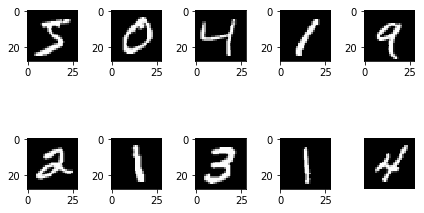

In [10]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [11]:
# Define your neural network
mnist_model = NeuralNetwork(784,30,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training time: 20.563825130462646


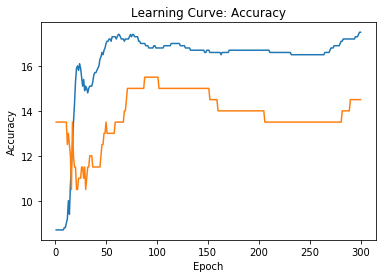

Training time: 20.65322971343994


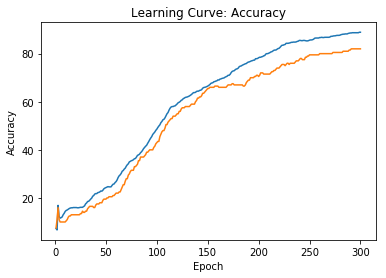

Training time: 21.15587615966797


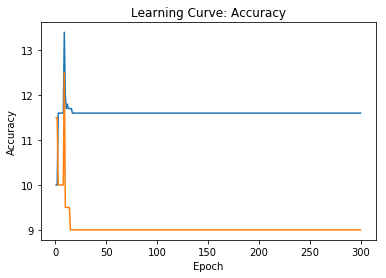

Accuracy of model with learning rate 0.1 =  1609
Accuracy of model with learning rate 1 =  8284
Accuracy of model with learning rate 10 =  1049


In [20]:
# Train NN and print accuracy on test data
iterations = 300

# Learning rate 0.1
lr = 0.1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_01 = mnist_model.predict(test_data)

# Learning rate 1.
lr = 1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_1 = mnist_model.predict(test_data)

# Learning rate 10.
lr = 10
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_10 = mnist_model.predict(test_data)
print('Accuracy of model with learning rate 0.1 = ', test_accuracy_01)
print('Accuracy of model with learning rate 1 = ', test_accuracy_1)
print('Accuracy of model with learning rate 10 = ', test_accuracy_10)

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 19.966659545898438


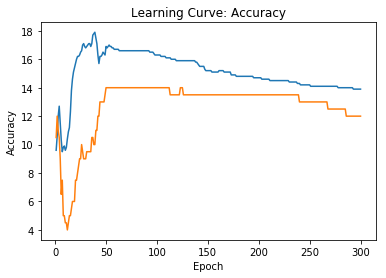

Training time: 20.046462059020996


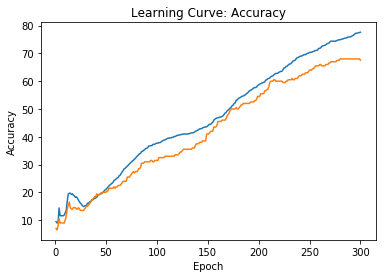

Training time: 19.949626445770264


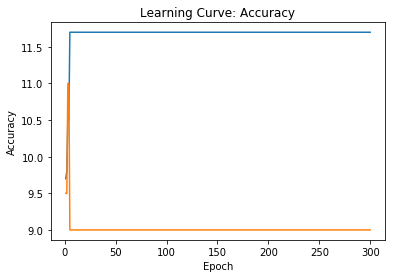

Accuracy of model with learning rate 0.1 =  1355
Accuracy of model with learning rate 1   =  7338
Accuracy of model with learning rate 10  =  1028


In [13]:
# 15 hidden neurons
mnist_model = NeuralNetwork(784,15,10)

# Learning rate 0.1
lr = 0.1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_01 = mnist_model.predict(test_data)

# Learning rate 1
lr = 1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_1 = mnist_model.predict(test_data)

# Learning rate 10
lr = 10
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_10 = mnist_model.predict(test_data)
print('Accuracy of model with learning rate 0.1 = ', test_accuracy_01)
print('Accuracy of model with learning rate 1   = ', test_accuracy_1)
print('Accuracy of model with learning rate 10  = ', test_accuracy_10)

Training time: 23.885436058044434


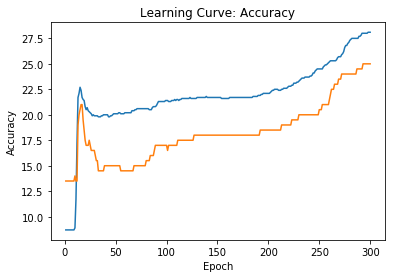

Training time: 24.03170418739319


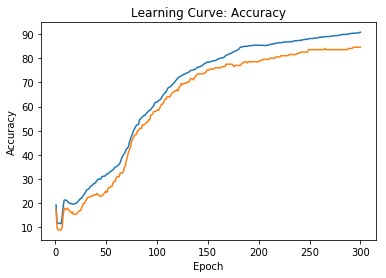

Training time: 24.173322916030884


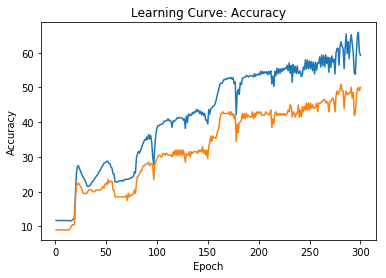

Accuracy of model with learning rate 0.1 =  2676
Accuracy of model with learning rate 1   =  8437
Accuracy of model with learning rate 10  =  5353


In [14]:
# 75 hidden neurons
mnist_model = NeuralNetwork(784,75,10)

# Learning rate 0.1
lr = 0.1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_01 = mnist_model.predict(test_data)

# Learning rate 1
lr = 1
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_1 = mnist_model.predict(test_data)

# Learning rate 10
lr = 10
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations, lr)
test_accuracy_10 = mnist_model.predict(test_data)
print('Accuracy of model with learning rate 0.1 = ', test_accuracy_01)
print('Accuracy of model with learning rate 1   = ', test_accuracy_1)
print('Accuracy of model with learning rate 10  = ', test_accuracy_10)

<b>Question 2.1.4</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 1.6888628005981445


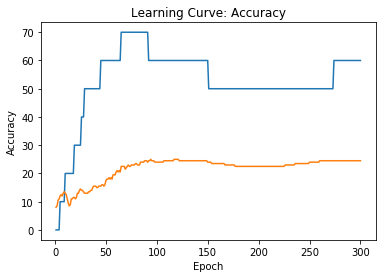

Training time: 1.62288236618042


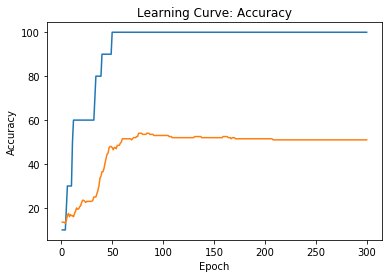

Training time: 1.6580698490142822


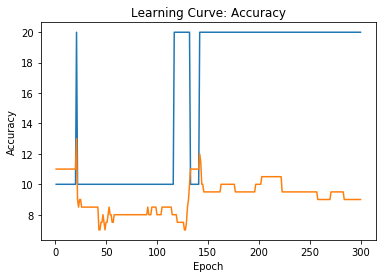

Accuracy of model with learning rate 0.1 =  2726
Accuracy of model with learning rate 1   =  5135
Accuracy of model with learning rate 10  =  1020


In [16]:
# 30 hidden neurons
mnist_model = NeuralNetwork(784,30,10)

# Learning rate 0.1
lr = 0.1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_01 = mnist_model.predict(test_data)

# Learning rate 1.
lr = 1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_1 = mnist_model.predict(test_data)

# Learning rate 10.
lr = 10
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_10 = mnist_model.predict(test_data)
print('Accuracy of model with learning rate 0.1 = ', test_accuracy_01)
print('Accuracy of model with learning rate 1   = ', test_accuracy_1)
print('Accuracy of model with learning rate 10  = ', test_accuracy_10)

Training time: 1.6172966957092285


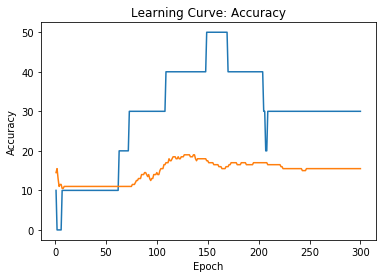

Training time: 1.5544319152832031


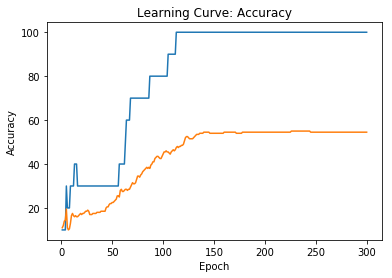

Training time: 1.5525619983673096


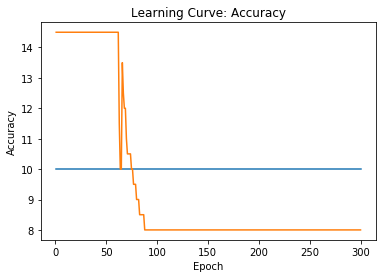

Accuracy of model with learning rate 0.1 =  1524
Accuracy of model with learning rate 1   =  4970
Accuracy of model with learning rate 10  =  998


In [17]:
# 15 hidden neurons
mnist_model = NeuralNetwork(784,15,10)

# Learning rate 0.1
lr = 0.1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_01 = mnist_model.predict(test_data)

# Learning rate 1.
lr = 1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_1 = mnist_model.predict(test_data)

# Learning rate 10.
lr = 10
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_10 = mnist_model.predict(test_data)
print('Accuracy of model with learning rate 0.1 = ', test_accuracy_01)
print('Accuracy of model with learning rate 1   = ', test_accuracy_1)
print('Accuracy of model with learning rate 10  = ', test_accuracy_10)

Training time: 1.976752758026123


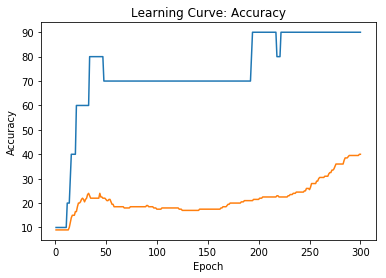

Training time: 1.9045193195343018


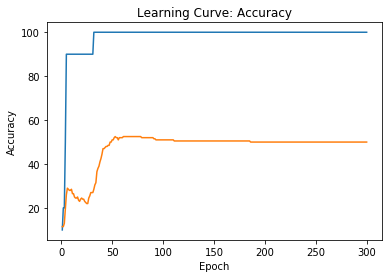

Training time: 1.923147201538086


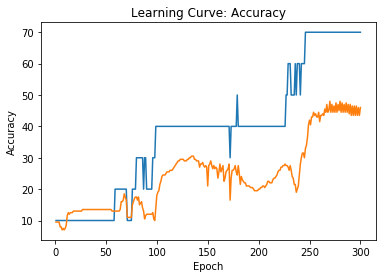

Accuracy of model with learning rate 0.1 =  3916
Accuracy of model with learning rate 1   =  4168
Accuracy of model with learning rate 10  =  998


In [18]:
# 75 hidden neurons
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 0.1
lr = 0.1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_01 = mnist_model.predict(test_data)

# Learning rate 1.
lr = 1
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_1 = mnist_model.predict(test_data)

# Learning rate 10.
lr = 10
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations, lr)
test_accuracy_1 = mnist_model.predict(test_data)
print('Accuracy of model with learning rate 0.1 = ', test_accuracy_01)
print('Accuracy of model with learning rate 1   = ', test_accuracy_1)
print('Accuracy of model with learning rate 10  = ', test_accuracy_10)

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

When choosing designing the neural network in questions 2.1.2, 2.1.3 and 2.1.4 we varied two hyperparameters, and tried training with two different sizes of training data. 

When the learning rate is concerned, the behaviour of the networks were as predicted by theory. In general when the learning rate was too small (**learning rate = 0.1**) the networks had trouble converging towards a minima of the loss function in 300 iterations, and the accuracy often stagnated after approximately 50 iterations. This behaviour can be seen in figures X Y and Z. When the learning rate was too big (**learning rate = 10**) the accuracy of the network oscilated a lot, on both training data, and validation data. This can be seen in figure X, Y and Z. This is because the network is having trouble converging to a minimum of the loss function because each "step" taken when applying the back-propagation algorithm is too large, and one "steps over" the minima of the loss function. Setting the learning rate equal to 1 seems to be the sweet spot for this network structure (and classification problem), as it usually performs best on the test data, compared to the two other learning rates. 

When comparing the performance of the networks with different sizes of the hidden layer (**15, 30 and 75 neurons**), the results were closely linked to the size of the training data. When using __small_training_data__, it was the network with 75 neurons in the hidden layer that performed best on the test data, it was closely followed by the network with 30 neurons in the hidden layer, and last came the network with 15 neurons in the hidden layer. When using  __vsmall_training_data__ to train the networks, the accuracy of all the networks on the test data decreased (as expected). Worth noting, is that the networks with 15, and 30 neurons in the hidden layer performed equally well, while the network with 75 neurons in the hidden layer performed worst over all. Also, the performance of all the networks on the validation data was significantly lower than the performance on the training data, compared to when we used __small_training_data__ to train them. When hidden layer size is concerned, the lesson to take away is that it must be chosen with close regard to the size of the set of training data. If the hidden layer is too small compared to the training data one has available, one misses out on potential accuracy. If the hidden layer is to big compared to the training data there is a great probability of the network overfitting, and a hidden layer of a smaller size would have performed better. 

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Since we are using the entire training set now, we predict that the network with 75 neurons in the hidden layer will perform better, as it performed best on the small training set, and should perform even better now that the training set is bigger.

From previous tests, the networks with learning rate = 1 always performed best, with one exception. When using training the network with 75 neurons in the hidden layer on a very small training set. But, we do not finds the results of that experiment relevant for this decision. 

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1522.8139069080353


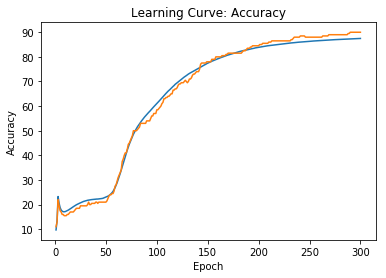

In [23]:
mnist_model = NeuralNetwork(784,75,10)
# Learning rate 1
lr = 1
mnist_model.weights_init()
mnist_model.train(training_data, small_validation_data, iterations, lr)
test_accuracy = mnist_model.predict(test_data)

In [28]:
print('Accuracy of predicted best model = ', test_accuracy)

Accuracy of predicted best model =  8839


<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = $

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [ ]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        pass

    def backpropagate_xe(self, targets, learning_rate=5.0):
        pass

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

In [ ]:
# Define your neural network
mnist_model_xe = 

# Train NN and print accuracy on validation data

In [ ]:
# Print accuracy on test data

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

<div align="center"><b>THE END!</b>